For citation information, please see the "Source Information" section listed in the associated README file: https://github.com/stephbuon/digital-history/tree/master/hist3368-week5-plotting-change-over-time/

# Week 5: Working With Dates in Python

### by Jo Guldi and Steph Buongiorno, with help from half-dozen datetime and matplotlib tutorials found in various places around the Web

There are many reasons why a data scientist might want to understand change over time: for instance, to answer the historical question, what changed in how Congress talked over a short period of time?  Answering that question implies using word count over time. 
    
Python treats dates (Jan 1 2020) as a discrete kind of data.  Some basic guidance can make it much easier to work with dates.  The datetime package is extremely useful for processing data. The first exercises below will lead us towards two questions:
   * How do we work with the datetime package to format dates?
   * How should we represent time on a graph to make it legible?
    
We'll use the **datetime** package, commonly abbreviated **dt**.  We'll also learn the commands:
     
     .to_datetime
     dt.month
     dt.day
     dt.year
     dt.to_period('M')

First, make sure you've set up datetime, pandas, and numpy:

In [13]:
import datetime
import pandas as pd
import numpy as np

### Meet the Datetime Package

Now, let's meet the pandas command, 'to_datetime'

The package _datetime_ offers an efficient way to extract year from string format data.

The command pd.to_datetime() tells pandas to treat a data as a date.  


In [14]:
pd.to_datetime('3-1-30')

Timestamp('2030-03-01 00:00:00')

In [15]:
pd.to_datetime('Mar 1 2021')

Timestamp('2021-03-01 00:00:00')

In [16]:
pd.to_datetime('today')

Timestamp('2021-09-20 10:44:53.419496')

In [17]:
pd.to_datetime('now')

Timestamp('2021-09-20 15:44:53.430061')

In [18]:
today = pd.to_datetime('now')
today.year


2021

In [19]:
today.month

9

In [20]:
today.day

20

In [21]:
today.to_period('M')

Period('2021-09', 'M')

What a smart little program!

## Work With Time in Tabular Data

As you will recall from last time, we often work with "tabular data" -- data that lives in tables, like spreadsheets or dataframes.  In most of the data challenges, there's a column called "date" or "time." In last week's problem set, you practiced calling that column.  In this week's problem set, we'll use that column to organize tabular data -- for instance, ranking other columns by what came first in time. 

Before we work with time and text, let's try an even simpler example: a table where we have a list of names and a list of birth dates.  How do we order our individuals in terms of youngest and oldest?

First let's make a dummy data set of names and birthdays.  

(don't worry too much about the lines of code directly below; it just makes up a fictional data set that we'll play with)

In [22]:
raw_data = {'name': ['Willard Morris', 'Al Jennings', 'Omar Mullins', 'Spencer McDaniel', 'Donna Faye', 'Alexander McQueen', 'Harold Bistander', 'Henrietta Morgan'],
'favorite_color': ['blue', 'red', 'yellow', 'green', 'pink', 'purple', 'olive', 'black'],
'grade': [88, 92, 95, 70, 75, 70, 80, 90],
'birth_date': ['01-02-1996', '08-05-1997', '04-28-1996', '12-16-1995', '07-01-1976', '08-03-1964', '02-22-2001', '03-28-1970']}
df = pd.DataFrame(raw_data, index = ['Willard Morris', 'Al Jennings', 'Omar Mullins', 'Spencer McDaniel', 'Donna Faye', 'Alexander McQueen', 'Harold Bistander', 'Henrietta Morgan'])
df

,name,favorite_color,grade,birth_date
Willard Morris,Willard Morris,blue,88,01-02-1996
Al Jennings,Al Jennings,red,92,08-05-1997
Omar Mullins,Omar Mullins,yellow,95,04-28-1996
Spencer McDaniel,Spencer McDaniel,green,70,12-16-1995
Donna Faye,Donna Faye,pink,75,07-01-1976
Alexander McQueen,Alexander McQueen,purple,70,08-03-1964
Harold Bistander,Harold Bistander,olive,80,02-22-2001
Henrietta Morgan,Henrietta Morgan,black,90,03-28-1970


As we saw above, the command pd.to_datetime() tells pandas to treat a data as a date.  

If pd.to_datetime() is applied to a paragraph, it tells the computer to treat the column as if the data in that column is composed of dates. 

The DateTime package commands _dt.year_ and _dt.month_ can then be appended to the dates, telling the computer to extract particular portions of the date information.

The command .year tells datetime to extract the year from a date.

In the line of code below, we tell the computer to look at the birth_date column, to recognize that the birthdate column is composed of dates, and to create a new column called "year" with the data in the birth_date column's year section.  Study the line of code below until you think you understand it.

In [23]:
df['year'] = pd.to_datetime(df['birth_date']).dt.year
df.head()

,name,favorite_color,grade,birth_date,year
Willard Morris,Willard Morris,blue,88,01-02-1996,1996
Al Jennings,Al Jennings,red,92,08-05-1997,1997
Omar Mullins,Omar Mullins,yellow,95,04-28-1996,1996
Spencer McDaniel,Spencer McDaniel,green,70,12-16-1995,1995
Donna Faye,Donna Faye,pink,75,07-01-1976,1976


You can also extract just the month.

In [24]:
df['month'] = pd.to_datetime(df['birth_date']).dt.month
df.head()

,name,favorite_color,grade,birth_date,year,month
Willard Morris,Willard Morris,blue,88,01-02-1996,1996,1
Al Jennings,Al Jennings,red,92,08-05-1997,1997,8
Omar Mullins,Omar Mullins,yellow,95,04-28-1996,1996,4
Spencer McDaniel,Spencer McDaniel,green,70,12-16-1995,1995,12
Donna Faye,Donna Faye,pink,75,07-01-1976,1976,7


We can also extract the day/month/year using the to_period function.  

dt.to_period() takes the inputs 'D', 'M', 'Y', depending on what period you want. 

Pay attention to the output of the month_year column and how it differs from the month column.  

In [25]:
df['month_year'] = pd.to_datetime(df['birth_date']).dt.to_period('M')
df.head()

,name,favorite_color,grade,birth_date,year,month,month_year
Willard Morris,Willard Morris,blue,88,01-02-1996,1996,1,1996-01
Al Jennings,Al Jennings,red,92,08-05-1997,1997,8,1997-08
Omar Mullins,Omar Mullins,yellow,95,04-28-1996,1996,4,1996-04
Spencer McDaniel,Spencer McDaniel,green,70,12-16-1995,1995,12,1995-12
Donna Faye,Donna Faye,pink,75,07-01-1976,1976,7,1976-07


### 'Flooring' the date -- how to add 'decade' to the period

Sometimes you want to round every date to the month/year or the day, so that you can count the top words of the date.  This could be important if you have -- for instance in Reddit -- timestamps with the hour that you want to round to the day or the month.  You could count the top words by every datetime, but you'd be looking at the top words associated with every second -- which is probably less interesting than the top words of the day or month or year.

When we want to add a decade, we need a slightly different procedure.  

We want to "floor" the date.  "Flooring" is different from "rounding." 

In [26]:
np.floor(1976/10)*10

1970.0

In [27]:
np.round(1976/10)*10

1980.0

When we're working with dates, we have the convention of referring to 1976 as part of the 1970s, not the 1980s.  "Flooring" describes the math involved -- it looks down for the nearest integer floor, rather than both up and down for the nearest number.  All you really need to know is that you should be flooring rather than rounding in the case of months or decades, so that your dates make sense to an outside interpreter.  Otherwise, you might produce an analysis and show your data, only to have a quizzical response from a historian that asks you with 1976 counts as part of the 1980s, and what your evidence of change in the 1970s really means.

We can use the *.floor()* command to floor dates.

In the line of code below, we'll add a column called 'decade.'  Notice that we use the 'floor' command, note a datetime command.

In [28]:
df['decade'] = np.floor(df['year'] / 10) * 10 # round each year to the nearest ten -- by dividing by ten and "flooring" to the lowest integer

# this line reformats the column so that decade is displayed as '1990' not '1990.00':
df['decade'] = df['decade'].astype(int) # treat it like an integer, not a decimal
df

,name,favorite_color,grade,birth_date,year,month,month_year,decade
Willard Morris,Willard Morris,blue,88,01-02-1996,1996,1,1996-01,1990
Al Jennings,Al Jennings,red,92,08-05-1997,1997,8,1997-08,1990
Omar Mullins,Omar Mullins,yellow,95,04-28-1996,1996,4,1996-04,1990
Spencer McDaniel,Spencer McDaniel,green,70,12-16-1995,1995,12,1995-12,1990
Donna Faye,Donna Faye,pink,75,07-01-1976,1976,7,1976-07,1970
Alexander McQueen,Alexander McQueen,purple,70,08-03-1964,1964,8,1964-08,1960
Harold Bistander,Harold Bistander,olive,80,02-22-2001,2001,2,2001-02,2000
Henrietta Morgan,Henrietta Morgan,black,90,03-28-1970,1970,3,1970-03,1970


## Visualizing with dates

In [29]:
import matplotlib
import matplotlib.pyplot as plt

Visualizing data with dates in python requires a few tricks. There are only a few major things to know:
* Conventions of visualization dictate that time be treated on the x axis, with the years in order.
* When you have rounded dates, you want to make sure that the axis labels correspond to the quantities to which you have rounded them.
* Because some conventions of listing dates put the month first, if you're working with full dates rather than with years, you need to make sure that Python knows how to "order" the dates.

Let's take the first one first.  _Put time on the x axis._  Here's what happens if you aren't careful.

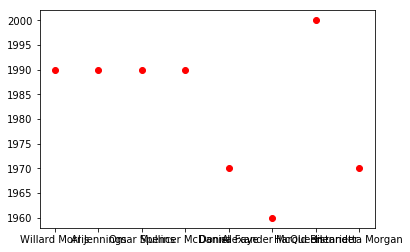

In [30]:
%matplotlib inline
plt.scatter(df.name, df.decade, color='red')
plt.show()

You might notice that a few things are wrong here.  Matplotlib has generated labels for us -- but they're very hard to read.  But that's not the only trouble. 

You might observe that your tendency is to try to read this chart from left to right, like text.  In which case it looks like first there were four people born at the same time, followed by a dearth of births and a rise in births.  This interpretation is totally wrong for several reasons: first, change over time goes from the bottom up; second, this is a scatterplot of names and dates, not a graph representing quantities.  But it's easy to be fooled about how to read change over time in a graph -- if you're not paying attention to your axes. 

Let's rotate the axes now and see how much easier it is to read.

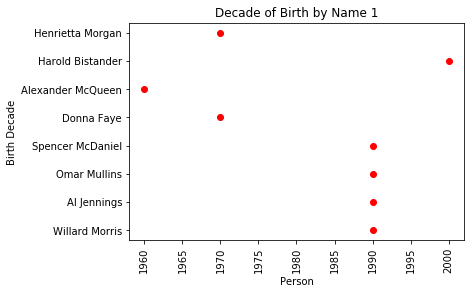

In [31]:
%matplotlib inline
plt.scatter(df.decade, df.name, color='red') # notice that we've switched the order so that decade is plotted on the x axis
plt.xticks(rotation=90) # puts the labels at a 90 angle so that they fit
plt.ylabel("Birth Decade") # don't forget to label the axes
plt.xlabel("Person")
plt.title("Decade of Birth by Name 1") # and label the plot!
plt.show() 

That's much better.  You can read the chart from left to right, noticing that four people were born in 1990.

However, there's still a problem.  Look at the labels on the x-axis.  Notice that no one is listed as having been born near 1975, even though we have a birthdate in 1976.  

The problem is that the axis labels don't fit our data.  The x-axis doesn't seem to recognize that we're dealing with decades! Let's fix that so that our readers aren't confused about what the plot is showing.

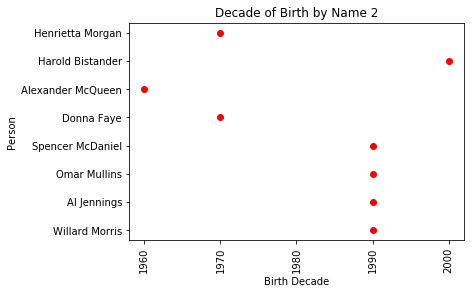

In [32]:
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
    
# tell it where to put the ticks only every 10 years
xt = np.arange(df.decade.min(), df.decade.max()+1) # we create a dummy list of each decade
xt = xt[xt%10==0] # we use the modulus ("%") to only admit numbers "floored" to the nearest ten.
# xt will be fed to the visualization as a list of ticks for the x-axis.

#plt.style.use('ggplot')
plt.scatter(df.decade, df.name, color='red')
plt.xlabel("Birth Decade")
plt.ylabel("Person")
plt.xticks(rotation=90)
plt.xticks(xt) # this line of code tells the plot to put axes only on the list of number in xt -- that is, whole decade numbers
plt.title("Decade of Birth by Name 2")
plt.show()

By generating a list of decades in the variable xt, we can tell matplotlib to only put axis marks on the decades listed in xt.  The visualization makes a lot more sense -- a naive reader could guess that we're just plotting decades, because there aren't any extra x-axis years to suggest zero birthdays in between.

Now let's try plotting birth dates -- which have, as you'll remember, information about month, day, and year in them.

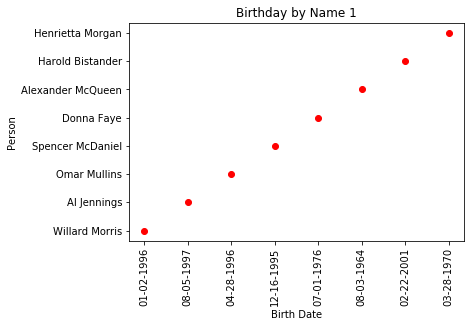

In [33]:
%matplotlib inline

plt.scatter(df.birth_date, df.name, color='red')
plt.xlabel("Birth Date")
plt.ylabel("Person")
plt.xticks(rotation=90)
#plt.xticks(xt)
plt.title("Birthday by Name 1")
plt.show() 

Looks great!  -- but hey, wait a minute; 1964 doesn't come after 1996... It's putting the dates in the order in which they were arranged, randomly, when we entered the data.  The plot must be treating everything in the birth_date column like it's a string.  That's not very useful; it doesn't tell us anything about time.

Let's try adding a few lines of code to tell pandas to "sort" the values of birth_date from small to large, treating each value like a date.

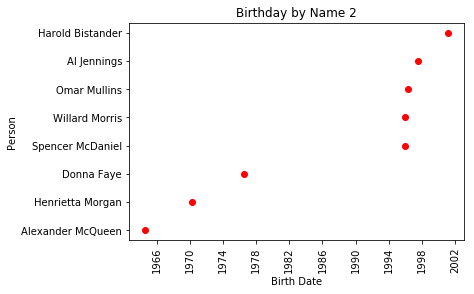

In [34]:
%matplotlib inline

# this time, before we plot, let's ask pandas to sort the values
df.birth_date = pd.to_datetime(df.birth_date) # instructs pandas to treat birth_date like a date
df = df.sort_values('birth_date', ascending=True) # re-sorts the df by date

plt.scatter(df.birth_date, df.name, color='red')
plt.xlabel("Birth Date")
plt.ylabel("Person")
plt.xticks(rotation=90)

#plt.xticks(xt)
plt.title("Birthday by Name 2")
plt.show()


## Assignment


1) Add your own birthday to the dataset.  Plot the chart.  Upload the resulting image here.

2) Compare "Birthday by Name 2" and "Decade of Birth 2"  

What's the difference between the two?  When might one format be more useful? 

Compose your answer in a paragraph of at least three sentences. Paste it into Canvas.

4